# Projet de fin de semestre

Ce projet vise à aborder le problème de la détection de spam en utilisant des techniques de Machine Learning (ML) apprises au cours du semestre, ainsi que des réseaux de neurones. Notre objectif est de développer un système capable d'identifier efficacement les courriels indésirables dans une boîte de réception.

Le processus de détection de spam comprend plusieurs étapes clés. Tout d'abord, nous effectuons un prétraitement des données en éliminant les informations redondantes, en normalisant le texte et en supprimant les éléments non pertinents. Cela permet de préparer les données pour l'étape suivante.

Ensuite, nous procédons à l'extraction de caractéristiques à partir des courriels. Les caractéristiques peuvent inclure des informations telles que les mots clés, la fréquence des termes, les informations de l'expéditeur, etc. Ces caractéristiques permettent de représenter les courriels de manière appropriée pour l'entraînement des modèles.

Après l'extraction des caractéristiques, nous passons à l'étape d'entraînement et d'évaluation des modèles. Nous utilisons des techniques de ML, telles que les réseaux de neurones, pour développer des modèles capables d'apprendre à distinguer les courriels de spam des courriels légitimes. Nous ajustons les hyperparamètres des modèles et les entraînons sur un ensemble de données d'entraînement.

Enfin, nous évaluons les performances de nos modèles en utilisant des métriques telles que la précision, le rappel et la F-mesure. Nous comparons également les résultats obtenus par différents modèles pour identifier celui qui offre les meilleures performances dans la détection de spam.

Ce projet nous permettra de mettre en pratique les connaissances acquises en ML et d'explorer l'utilisation des réseaux de neurones dans un domaine spécifique, en l'occurrence la détection de spam.

## Justification du choix des bibliotheques 

* **scikit-learn** : Nous avons choisi d'utiliser scikit-learn pour ses fonctionnalités d'évaluation des modèles et pour son large éventail d'algorithmes d'apprentissage automatique pré-implémentés. Scikit-learn fournit des outils pour évaluer la performance des modèles à l'aide de métriques telles que la précision, le rappel, la F-mesure, etc. De plus, il offre des fonctionnalités avancées telles que la validation croisée et l'optimisation des hyperparamètres.

* **Keras** avec TensorFlow comme backend : Nous avons opté pour Keras en combinaison avec TensorFlow comme backend pour l'implémentation des réseaux de neurones. Keras est une bibliothèque conviviale et puissante qui facilite la création et l'entraînement des modèles de réseaux de neurones. TensorFlow, quant à lui, fournit une infrastructure solide pour exécuter des calculs sur des graphiques de flux de données et optimise les performances des opérations de calcul nécessaires à l'entraînement des réseaux de neurones.

* **NumPy** : Nous avons utilisé NumPy pour le prétraitement des données. NumPy est une bibliothèque Python qui offre des structures de données de haute performance pour la manipulation de tableaux multidimensionnels. Elle nous a permis d'effectuer des opérations efficaces sur les données, telles que la normalisation, la transformation et le traitement des matrices.

* **NLTK** (Natural Language Toolkit) : Nous avons choisi NLTK pour manipuler le texte dans notre projet de détection de spam. NLTK est une bibliothèque spécialisée dans le traitement du langage naturel en Python. Elle fournit des outils pour le tokenization, la lemmatisation, le stemming, la suppression des stopwords, etc. Ces fonctionnalités nous ont permis de prétraiter efficacement les données textuelles avant de les utiliser dans nos modèles de détection de spam.

* **pandas** : Nous avons utilisé pandas pour faciliter le prétraitement des données grâce à ses méthodes puissantes. Cette bibliothèque fournit des structures de données de haute performance (notamment les DataFrames) et des outils de manipulation de données, ce qui nous a permis d'effectuer des opérations telles que le chargement des données, le filtrage, la fusion, le tri, etc. De plus, pandas offre une intégration transparente avec d'autres bibliothèques couramment utilisées en science des données.

* **matplotlib** : Nous avons utilisé matplotlib pour créer des graphiques et des visualisations de données. Cette bibliothèque Python permet de générer des graphiques de haute qualité, tels que des histogrammes, des diagrammes en boîte, des diagrammes en barres, des courbes, etc. Ces visualisations nous ont aidés à analyser les résultats de nos modèles et à communiquer efficacement les informations à travers des graphiques clairs et concis.

* **pickle** : Nous avons utilisé pickle pour faciliter la sauvegarde et le chargement des données. Pickle est une bibliothèque Python permettant de sérialiser les objets Python en un format binaire, ce qui facilite leur stockage et leur récupération ultérieure. En utilisant pickle, nous avons évité de retraiter les données à chaque exécution du code, ce qui a accéléré le processus de développement et d'évaluation  des modèles.

In [149]:
import re
import nltk
import pandas as pd
import os
import numpy as np
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
import tensorflow as tf
from keras.callbacks import History
from keras.layers import Embedding, Multiply, Dense, Dot, Conv2D, Input, Flatten, Dropout,Conv1D,MaxPooling1D,LSTM, Bidirectional
from keras.layers import concatenate
from keras.models import Model
from tensorflow import expand_dims
from tensorflow.keras.utils import to_categorical
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Pretraitement du texte

In [2]:
def clean_email(email):
    # Convertir en minuscules
    email = email.lower()
    
    # Supprimer les balises HTML
    email = re.sub(r'<[^<>]+>', '', email)
    
    # Normaliser les URLs
    email = re.sub(r'(http|https)://[^\s]*', 'httpaddr', email)
    
    # Normaliser les adresses email
    email = re.sub(r'[^\s]+@[^\s]+', 'emailaddr', email)
    
    # Normaliser les nombres
    email = re.sub(r'\d+', 'nombre', email)
    
    # Normaliser les signes dollar
    email = re.sub(r'[$]+', 'dollar', email)
    
    # Appliquer la radicalisation de mots (Word stemming)
    stemmer = PorterStemmer()
    words = re.findall(r'\w+', email)
    email = ' '.join([stemmer.stem(word) for word in words])
    
    # Supprimer les mots vides et la ponctuation et normaliser les espaces blancs
    email = re.sub(r'[^a-zA-Z0-9]', ' ', email)
    email = re.sub(r'\s+', ' ', email)
    email = email.strip()
    
    # Supprimer les mots vides
    stop_words = set(stopwords.words('english'))
    words = email.split()
    words = [word for word in words if word not in stop_words]
    email = ' '.join(words)
    
    return email

In [3]:

# defining a function to load the data
def get_data(path):
    # setting an empty list to store the data
    data = []
    files = os.listdir(path) # getting the files
    
    for file in files:
        # getting the file and loading it in memory
        processed_file = open(path + file, encoding = "ISO-8859-1")
        # reading the file
        words_list = processed_file.read()
        # appending the processed data
        data.append(words_list)
        # closing the file
        processed_file.close()
    
    # returning the final result
    return data

In [4]:
dat=get_data("easy_ham/easy_ham/")

In [5]:
df = pd.DataFrame(dat,columns=["e-mail"])
df["label"]=0
df["class"]="easy_ham"
df.sample(10)

,e-mail,label,class
2470,From rssfeeds@jmason.org Tue Oct 8 10:56:06 ...,0,easy_ham
141,From ilug-admin@linux.ie Mon Oct 7 12:07:12 ...,0,easy_ham
607,From fork-admin@xent.com Wed Sep 11 13:49:34 ...,0,easy_ham
2063,From rssfeeds@jmason.org Thu Sep 26 16:42:08 ...,0,easy_ham
1448,From spamassassin-talk-admin@lists.sourceforge...,0,easy_ham
1108,From exmh-users-admin@redhat.com Thu Sep 19 1...,0,easy_ham
1385,From rpm-list-admin@freshrpms.net Tue Oct 8 ...,0,easy_ham
2233,From rssfeeds@jmason.org Tue Oct 1 10:37:07 ...,0,easy_ham
1628,From spamassassin-talk-admin@lists.sourceforge...,0,easy_ham
2401,From rssfeeds@jmason.org Sun Oct 6 22:54:35 ...,0,easy_ham


In [6]:
df["e-mail"]=df["e-mail"].apply(lambda x : clean_email(x))
df.sample(10)

,e-mail,label,class
698,emailaddr thu sep nombr nombr nombr nombr nomb...,0,easy_ham
1052,emailaddr mon sep nombr nombr nombr nombr nomb...,0,easy_ham
1370,emailaddr tue oct nombr nombr nombr nombr nomb...,0,easy_ham
1136,emailaddr thu sep nombr nombr nombr nombr nomb...,0,easy_ham
232,emailaddr wed aug nombr nombr nombr nombr nomb...,0,easy_ham
2021,emailaddr thu sep nombr nombr nombr nombr nomb...,0,easy_ham
162,emailaddr tue oct nombr nombr nombr nombr nomb...,0,easy_ham
2348,emailaddr fri oct nombr nombr nombr nombr nomb...,0,easy_ham
1557,emailaddr thu sep nombr nombr nombr nombr nomb...,0,easy_ham
348,emailaddr tue oct nombr nombr nombr nombr nomb...,0,easy_ham


In [7]:
dat1=get_data("hard_ham/hard_ham/")

In [8]:
df1 = pd.DataFrame(dat1,columns=["e-mail"])
df1["label"]=0
df1["class"]="hard_ham"
df1.sample(10)

,e-mail,label,class
217,From bounce-ora_webprog-1083425@newsletter.ore...,0,hard_ham
164,From bounce-neatnettricks-2424157@silver.lyris...,0,hard_ham
30,Return-Path: <Online#3.19820.a5-ydZylz9lGW0yrs...,0,hard_ham
11,Return-Path: <bounce-lgmac-2534372@sprocket.lo...,0,hard_ham
93,Return-Path: <Online#3.20341.24-QI_LgZARqA78Cd...,0,hard_ham
239,Received: from vineyard.net (K1.VINEYARD.NET [...,0,hard_ham
39,Return-Path: <Online#3.19902.9e-vhsslwTcJGrvPd...,0,hard_ham
20,Return-Path: <bounce-lghtml-2534368@sprocket.l...,0,hard_ham
58,Return-Path: <bounce-lgmedia-2534370@sprocket....,0,hard_ham
131,From rpm-list-admin@freshrpms.net Wed Oct 9 ...,0,hard_ham


In [9]:

df1["e-mail"]=df1["e-mail"].apply(lambda x : clean_email(x))

In [10]:
dat2=get_data("spam_2/spam_2/")

In [11]:
df2 = pd.DataFrame(dat2,columns=["e-mail"])
df2["label"]=1
df2["class"]="spam"
df2.sample(10)

,e-mail,label,class
1356,From ilug-admin@linux.ie Thu Aug 8 15:54:40 ...,1,spam
265,From reply-56446664-6@william.free4all.com Mo...,1,spam
8,From spamassassin-sightings-admin@lists.source...,1,spam
1386,From Jhon67@aol.com Wed Dec 4 11:58:43 2002\...,1,spam
226,From tazgirlcd@msn.com Wed Jul 3 12:07:43 20...,1,spam
1363,From fork-admin@xent.com Wed Aug 7 16:11:18 ...,1,spam
1195,From fork-admin@xent.com Wed Jul 31 00:58:23 ...,1,spam
778,From pitster267540871@hotmail.com Fri Jul 19 ...,1,spam
906,Received: from hq.pro-ns.net (localhost [127.0...,1,spam
572,From hfcfyouroffers676@hotmail.com Mon Jun 24...,1,spam


In [12]:

df2["e-mail"]=df2["e-mail"].apply(lambda x : clean_email(x))

In [13]:
#combinaison des trois partie du dataset dans une seule 
result = pd.concat([df,df1,df2],ignore_index=True )
print(result.index)

RangeIndex(start=0, stop=4198, step=1)


In [14]:
result.head(20)

,e-mail,label,class
0,emailaddr thu aug nombr nombr nombr nombr nomb...,0,easy_ham
1,emailaddr thu aug nombr nombr nombr nombr nomb...,0,easy_ham
2,emailaddr thu aug nombr nombr nombr nombr nomb...,0,easy_ham
3,emailaddr thu aug nombr nombr nombr nombr nomb...,0,easy_ham
4,emailaddr thu aug nombr nombr nombr nombr nomb...,0,easy_ham
5,emailaddr thu aug nombr nombr nombr nombr nomb...,0,easy_ham
6,emailaddr thu aug nombr nombr nombr nombr nomb...,0,easy_ham
7,emailaddr thu aug nombr nombr nombr nombr nomb...,0,easy_ham
8,emailaddr thu aug nombr nombr nombr nombr nomb...,0,easy_ham
9,emailaddr thu aug nombr nombr nombr nombr nomb...,0,easy_ham


In [15]:
result = result.sample(frac=1).reset_index(drop=True)
result.head(20)

,e-mail,label,class
0,emailaddr mon sep nombr nombr nombr nombr nomb...,0,easy_ham
1,emailaddr mon sep nombr nombr nombr nombr nomb...,0,easy_ham
2,return path receiv list theregist co uk thereg...,0,hard_ham
3,emailaddr tue sep nombr nombr nombr nombr nomb...,0,easy_ham
4,emailaddr thu aug nombr nombr nombr nombr nomb...,0,easy_ham
5,emailaddr thu sep nombr nombr nombr nombr nomb...,0,easy_ham
6,emailaddr mon sep nombr nombr nombr nombr nomb...,0,easy_ham
7,emailaddr wed oct nombr nombr nombr nombr nomb...,0,easy_ham
8,return path deliv emailaddr receiv qmail nombr...,0,hard_ham
9,emailaddr mon sep nombr nombr nombr nombr nomb...,0,easy_ham


## Extraction du vocabulaire

In [16]:

def add_doc_to_vocab(tokens, vocab):
    l=len(tokens) 
    vocab.update(tokens)
    return l
def get_vocab(corpus, min_occurrence):
    words = corpus.tolist()
    vocab = Counter()

    for w in words:
        add_doc_to_vocab(w.split(), vocab)

    tokens = [k for k, c in vocab.items() if c >= min_occurrence]
    return tokens


nous avons selectionner 6 comme le nombre d'occurance minimal aprés plusieure test vu qu'elle donne un juste équilibre entre rapidité d'execution lors de l'extraction des caratéristiques ainsi que de bon résultats lors de la prédiction

In [17]:

corpus = result["e-mail"]
tokens=get_vocab(corpus,6)



## Extraction  des caractéristique

nous avons devlopper deux fonction pour extraire les caractéristiques selon les deux méthodes demandées apartir d'une phrase toyte en utilisant aux maximum numpy pour accelerer les calcul vu la grande taille des données par la suite vu que le texte est sauvgaeder dans une colonne du dataframe on utilisra  les methodes de pandas pour extraire les caractéristique de chaque case 

In [18]:
def gen_embed1(vocab, email):
    tokens = email.split()
    embedding = np.zeros(len(vocab))
    token_mask = np.isin(vocab, tokens)
    embedding[np.where(token_mask)] = 1
    return embedding.tolist()

In [19]:
def gen_embed2(vocab, email):
    tokens = email.split()
    embedding = np.zeros(len(vocab))
    for i, word in enumerate(vocab):
        
        embedding[i] = tokens.count(word)
    return embedding.tolist()

In [20]:
result["embed1"]=result["e-mail"].apply(lambda x : gen_embed1(tokens,x))


In [21]:
result["embed2"]=result["e-mail"].apply(lambda x : gen_embed2(tokens,x))
result.sample(20)


,e-mail,label,class,embed1,embed2
3072,emailaddr mon aug nombr nombr nombr nombr nomb...,0,easy_ham,"[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[7.0, 10.0, 0.0, 128.0, 1.0, 1.0, 1.0, 7.0, 3...."
4101,emailaddr tue sep nombr nombr nombr nombr nomb...,0,easy_ham,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[4.0, 1.0, 5.0, 85.0, 1.0, 1.0, 1.0, 4.0, 3.0,..."
2253,emailaddr sun sep nombr nombr nombr nombr nomb...,0,easy_ham,"[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[7.0, 0.0, 9.0, 141.0, 1.0, 1.0, 2.0, 7.0, 3.0..."
3636,emailaddr mon aug nombr nombr nombr nombr nomb...,0,easy_ham,"[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[8.0, 8.0, 0.0, 97.0, 1.0, 1.0, 2.0, 6.0, 4.0,..."
1694,receiv hq pro ns net localhost nombr nombr nom...,1,spam,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...","[14.0, 0.0, 0.0, 207.0, 0.0, 0.0, 0.0, 14.0, 1..."
3708,emailaddr tue oct nombr nombr nombr nombr nomb...,0,easy_ham,"[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[4.0, 0.0, 0.0, 64.0, 1.0, 1.0, 1.0, 3.0, 3.0,..."
4189,receiv karl nombr nombr basec net nombr nombr ...,1,spam,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[2.0, 0.0, 0.0, 53.0, 0.0, 0.0, 0.0, 3.0, 0.0,..."
1366,emailaddr mon jun nombr nombr nombr nombr nomb...,1,spam,"[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...","[3.0, 1.0, 0.0, 68.0, 1.0, 1.0, 0.0, 3.0, 0.0,..."
2892,emailaddr mon sep nombr nombr nombr nombr nomb...,0,easy_ham,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[8.0, 3.0, 12.0, 127.0, 1.0, 1.0, 1.0, 6.0, 2...."
3481,emailaddr fri aug nombr nombr nombr nombr nomb...,1,spam,"[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[5.0, 0.0, 0.0, 48.0, 1.0, 1.0, 1.0, 3.0, 0.0,..."


**Sauvgarde du vocabulaire dans un fichier txt pour une réutilisation directe**

In [22]:
with open(r'vocab.txt', 'w') as fp:
    fp.write(' '.join(tokens))

In [23]:
#code to read the file 
my_file = open("vocab.txt", "r")
  
# reading the file
data = my_file.read()
  

tokens = data.split(" ")
my_file.close()

**Vu le grand temps pour l'extraction des caractéristique nous avons aussi opter pour la sauvgarde du dataframe qui contient toute les donées pour une réutilisation directe**

In [24]:
file = open('dataset', 'wb')
pickle.dump(result, file)
file.close()

In [25]:
file = open('dataset', 'rb')
result = pickle.load(file)
file.close()
result.sample(10)

,e-mail,label,class,embed1,embed2
2338,emailaddr mon jun nombr nombr nombr nombr nomb...,1,spam,"[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...","[5.0, 1.0, 0.0, 68.0, 1.0, 1.0, 0.0, 3.0, 0.0,..."
2621,emailaddr wed sep nombr nombr nombr nombr nomb...,0,easy_ham,"[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[8.0, 0.0, 12.0, 150.0, 1.0, 1.0, 1.0, 7.0, 3...."
1100,emailaddr thu oct nombr nombr nombr nombr nomb...,0,easy_ham,"[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[12.0, 0.0, 0.0, 115.0, 2.0, 1.0, 3.0, 7.0, 3...."
1459,emailaddr mon sep nombr nombr nombr nombr nomb...,0,easy_ham,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[8.0, 3.0, 3.0, 159.0, 1.0, 2.0, 1.0, 6.0, 4.0..."
3117,emailaddr fri sep nombr nombr nombr nombr nomb...,0,easy_ham,"[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[10.0, 0.0, 12.0, 138.0, 1.0, 1.0, 1.0, 7.0, 2..."
453,emailaddr tue oct nombr nombr nombr nombr nomb...,0,easy_ham,"[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[4.0, 0.0, 0.0, 65.0, 1.0, 1.0, 1.0, 3.0, 3.0,..."
3219,emailaddr mon jun nombr nombr nombr nombr nomb...,1,spam,"[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...","[6.0, 1.0, 0.0, 128.0, 1.0, 1.0, 0.0, 7.0, 0.0..."
3639,emailaddr mon sep nombr nombr nombr nombr nomb...,0,easy_ham,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[8.0, 8.0, 8.0, 102.0, 1.0, 1.0, 2.0, 6.0, 3.0..."
3564,emailaddr thu sep nombr nombr nombr nombr nomb...,0,easy_ham,"[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[4.0, 0.0, 5.0, 63.0, 1.0, 1.0, 1.0, 3.0, 3.0,..."
1648,emailaddr fri jul nombr nombr nombr nombr nomb...,1,spam,"[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[6.0, 0.0, 0.0, 99.0, 1.0, 1.0, 1.0, 5.0, 3.0,..."


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [90]:
feature_cols = ['embed1']
X = result.loc[:, feature_cols].values.tolist()
print(np.array(X).shape)
X=np.squeeze(X,1)
y=result["label"].to_numpy()
Xt1, Xtt1, Yt1, Ytt1 = train_test_split(
      X, y, test_size = 0.20,random_state=42)



(4198, 1, 10783)


In [91]:
feature_cols = ['embed2']
X = result.loc[:, feature_cols].values.tolist()
print(np.array(X).shape)
X=np.squeeze(X,1)
y=result["label"].to_numpy()
# Perform scaling on X as the data in the second feauters is no longer only 1 or 0
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
Xt2, Xtt2, Yt2, Ytt2 = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

(4198, 1, 10783)


### Entrainemment des modèles Sklearn 

pour chaque modele nous procedons a l'evaluation deux fois une fois pour chaque caractéristique 

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### Random forest

In [95]:
# Train and evaluate a Random Forest classifier1
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(Xt1, Yt1)
y_pred_rf1 = rf.predict(Xtt1)
probas_rf1=rf.predict_proba(Xtt1) 
acc_rf1 = accuracy_score(Ytt1, y_pred_rf1)
report_rf1 = classification_report(Ytt1, y_pred_rf1)

In [96]:
# Train and evaluate a Random Forest classifier2
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(Xt2, Yt2)
y_pred_rf2 = rf.predict(Xtt2)
probas_rf2=rf.predict_proba(Xtt2) 
acc_rf2 = accuracy_score(Ytt2, y_pred_rf2)
report_rf2 = classification_report(Ytt2, y_pred_rf2)

In [97]:
print(f"Random Forest accuracy: {acc_rf1:.3f}")
print(report_rf1)

Random Forest accuracy: 0.994
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       575
           1       0.99      1.00      0.99       265

    accuracy                           0.99       840
   macro avg       0.99      0.99      0.99       840
weighted avg       0.99      0.99      0.99       840



In [98]:
print(f"Random Forest accuracy: {acc_rf2:.3f}")
print(report_rf2)

Random Forest accuracy: 0.996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       575
           1       0.99      1.00      0.99       265

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840



### KNN

**Definition du k a l'aide de Grid search**

In [99]:
from sklearn.model_selection import GridSearchCV

# Define the range of k values to search
param_grid = {'n_neighbors': range(2, 21)}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform cross-validation grid search
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(Xt1, Yt1)

# Get the best k value and the corresponding accuracy
best_k = grid_search.best_params_['n_neighbors']
best_acc_knn = grid_search.best_score_

# Print the results
print(f"Best k value: {best_k}")
print(f"Accuracy with best k: {best_acc_knn:.3f}")

Best k value: 2
Accuracy with best k: 0.981


In [100]:
# Train and evaluate KNN classifiers1
knn1 = KNeighborsClassifier(n_neighbors=2)
knn1.fit(Xt1, Yt1)
y_pred_knn1 = knn1.predict(Xtt1)
probas_knn1=knn1.predict_proba(Xtt1) 
acc_knn1 = accuracy_score(Ytt1, y_pred_knn1)
report_knn1 = classification_report(Ytt1, y_pred_knn1)


In [101]:
# Train and evaluate KNN classifiers2
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(Xt2, Yt2)
y_pred_knn2 = knn2.predict(Xtt2)
probas_knn2=knn2.predict_proba(Xtt2) 
acc_knn2 = accuracy_score(Ytt2, y_pred_knn2)
report_knn2 = classification_report(Ytt2, y_pred_knn2)

In [102]:
print(f"KNN accuracy: {acc_knn1:.3f}")
print(report_knn1)

KNN accuracy: 0.990
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       575
           1       0.99      0.98      0.98       265

    accuracy                           0.99       840
   macro avg       0.99      0.99      0.99       840
weighted avg       0.99      0.99      0.99       840



In [103]:
print(f"KNN accuracy: {acc_knn2:.3f}")
print(report_knn2)

KNN accuracy: 0.932
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       575
           1       0.95      0.83      0.89       265

    accuracy                           0.93       840
   macro avg       0.94      0.90      0.92       840
weighted avg       0.93      0.93      0.93       840



### Logistique Regression

**Comparaison entre la regression one vs all et la regression avec softmax **

In [104]:
# Create and train the logistic regression model using the "multinomial" solver
lr_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_multinomial.fit(Xt1, Yt1)

# Create and train the logistic regression model using the "ovr" (one-vs-rest) strategy
lr_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs')
lr_ovr.fit(Xt1, Yt1)

# Make predictions on the test set using the "multinomial" model
y_pred_multinomial = lr_multinomial.predict(Xtt1)
accuracy_multinomial = accuracy_score(Ytt1, y_pred_multinomial)
report_multinomial = classification_report(Ytt1, y_pred_multinomial)

# Make predictions on the test set using the "ovr" model
y_pred_ovr = lr_ovr.predict(Xtt1)
accuracy_ovr = accuracy_score(Ytt1, y_pred_ovr)
report_ovr = classification_report(Ytt1, y_pred_ovr)

# Print the classification reports for both models
print("Multinomial Logistic Regression:")
print(f"Accuracy: {accuracy_multinomial:.3f}")
print(report_multinomial)

print("One-vs-Rest (OvR) Logistic Regression:")
print(f"Accuracy: {accuracy_ovr:.3f}")
print(report_ovr)

Multinomial Logistic Regression:
Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       575
           1       1.00      1.00      1.00       265

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840

One-vs-Rest (OvR) Logistic Regression:
Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       575
           1       1.00      1.00      1.00       265

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840



les résultats sont idantique donc dans les prochain test nous allons laisser le choix automatique de la methode a utiliser 

In [105]:
# Train and evaluate Logistic Regression classifiers
lr1 = LogisticRegression()
lr1.fit(Xt1, Yt1)
y_pred_lr1 = lr1.predict(Xtt1)
probas_lr1=lr1.predict_proba(Xtt1) 
acc_lr1 = accuracy_score(Ytt1, y_pred_lr1)
report_lr1 = classification_report(Ytt1, y_pred_lr1)


In [106]:
# Train and evaluate Logistic Regression classifiers
lr2 = LogisticRegression()
lr2.fit(Xt2, Yt2)
y_pred_lr2 = lr2.predict(Xtt2)
probas_lr2=lr2.predict_proba(Xtt2) 
acc_lr2 = accuracy_score(Ytt2, y_pred_lr2)
report_lr2 = classification_report(Ytt2, y_pred_lr2)

In [107]:
print(f"Logistic Regression accuracy: {acc_lr1:.3f}")
print(report_lr1)

Logistic Regression accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       575
           1       1.00      1.00      1.00       265

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840



In [108]:
print(f"Logistic Regression accuracy: {acc_lr2:.3f}")
print(report_lr2)

Logistic Regression accuracy: 0.995
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       575
           1       0.99      1.00      0.99       265

    accuracy                           1.00       840
   macro avg       0.99      1.00      0.99       840
weighted avg       1.00      1.00      1.00       840



###  SVM

In [111]:
# Train and evaluate SVM classifiers with Gaussian kernel1
svm1 = SVC(kernel='rbf')
svm1.fit(Xt1, Yt1)
y_pred_svm1 = svm1.predict(Xtt1)
svm1p = SVC(kernel='rbf',probability=True)
svm1p.fit(Xt1, Yt1)
probas_svm1=svm1p.predict_proba(Xtt1) 
acc_svm1 = accuracy_score(Ytt1, y_pred_svm1)
report_svm1 = classification_report(Ytt1, y_pred_svm1)



In [112]:
# Train and evaluate SVM classifiers with Gaussian kernel2
svm2 = SVC(kernel='rbf')
svm2.fit(Xt2, Yt2)
y_pred_svm2 = svm2.predict(Xtt2)
svm2p = SVC(kernel='rbf',probability=True)
svm2p.fit(Xt2, Yt2)
probas_svm2=svm2p.predict_proba(Xtt2) 
acc_svm2 = accuracy_score(Ytt2, y_pred_svm2)
report_svm2 = classification_report(Ytt2, y_pred_svm2)

In [113]:
print(f"SVM accuracy: {acc_svm1:.3f}")
print(report_svm1)

SVM accuracy: 0.992
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       575
           1       0.99      0.98      0.99       265

    accuracy                           0.99       840
   macro avg       0.99      0.99      0.99       840
weighted avg       0.99      0.99      0.99       840



In [114]:
print(f"SVM accuracy: {acc_svm2:.3f}")
print(report_svm2)

SVM accuracy: 0.958
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       575
           1       1.00      0.87      0.93       265

    accuracy                           0.96       840
   macro avg       0.97      0.93      0.95       840
weighted avg       0.96      0.96      0.96       840



## Resaux de neurones 

Dans le cadre de notre projet, nous souhaitons expliquer notre choix d'utiliser des réseaux de neurones, en particulier les LSTM (Long Short-Term Memory) et les MLP (Multilayer Perceptron), pour la détection de spam. Notre décision repose sur les performances initiales exceptionnelles que nous avons obtenues lors de l'expérimentation précédente.

Les LSTM, en raison de leur capacité à prendre en compte les dépendances à long terme dans les données séquentielles, se sont avérés particulièrement efficaces dans la détection de spam. Ils permettent de capturer les schémas complexes présents dans les courriels et d'identifier les caractéristiques spécifiques associées aux spams.

D'autre part, les MLP sont également utilisés pour leur capacité à modéliser des relations non linéaires entre les variables d'entrée et de sortie. Bien qu'ils ne prennent pas en compte la séquentialité des données, ils sont capables d'apprendre des modèles de détection de spam à partir des caractéristiques extraites.

En ce qui concerne les hyperparamètres, nous avons basé nos choix sur des valeurs éprouvées lors d'expériences précédentes. Étant donné les excellents résultats initiaux obtenus, nous n'avons pas identifié de points d'amélioration évidents, et nous n'avons pas eu le temps d'explorer davantage les possibilités d'optimisation.

Dans l'ensemble, notre décision d'utiliser les réseaux de neurones LSTM et MLP pour la détection de spam repose sur leur capacité respective à capturer les dépendances séquentielles et à modéliser des relations non linéaires. Les performances initiales exceptionnelles obtenues, associées à un manque de temps pour des améliorations supplémentaires, ont renforcé notre choix d'aller de l'avant avec ces approches dans notre projet de détection de spam.

### LSTM

L'une des raisons pour lesquelles nous avons choisi d'utiliser les LSTM (Long Short-Term Memory) est leur capacité à traiter les données séquentielles de manière efficace. Contrairement aux réseaux de neurones traditionnels, les LSTM peuvent prendre en compte les dépendances à long terme entre les éléments d'une séquence, ce qui les rend particulièrement adaptés à la détection de spam.

Un avantage supplémentaire des LSTM réside dans leur capacité à empiler plusieurs couches LSTM les unes sur les autres. En empilant ces couches, le réseau est capable de capturer des motifs de plus en plus complexes et d'extraire des informations de plus haut niveau à partir des données séquentielles. Cela nous permet de modéliser avec précision les caractéristiques complexes et les schémas présents dans les courriels de spam.

Il convient de souligner que nos données et notre méthode de génération de caractéristiques sont relativement basiques, ce qui ne convient pas pleinement aux LSTM. Cependant, les LSTM sont robustes et peuvent s'adapter à des représentations de caractéristiques plus complexes, ce qui en fait un choix approprié pour notre tâche de détection de spam.

En résumé, nous avons opté pour les LSTM en raison de leur capacité à traiter les données séquentielles, à empiler des couches pour capturer des motifs complexes et à leur robustesse face à des techniques de représentation de caractéristiques plus avancées.

In [115]:
def define_lstm(length,n):
    # channel 1
    inputs1 = Input(shape=( 1, length))
    #lstm
    lstm1=Bidirectional(LSTM(n, return_sequences=True,input_shape = (1, length)))(inputs1)
    drop1 = Dropout(0.5)(lstm1)
    lstm2=Bidirectional(LSTM(n))(drop1)
    drop2 = Dropout(0.5)(lstm2)
    # interpretation
    dense1 = Dense(120, activation='relu')(drop2)
    outputs = Dense(1, activation='sigmoid')(dense1)
    model = Model(inputs=[inputs1], outputs=outputs)

    return model

In [116]:
length=X.shape[1] 
print(Xt1.shape)
Xtl1=Xt1.reshape((Xt1.shape[0], 1, Xt1.shape[1])) #transforming the input to match lstm input shape
print(Xt1.shape)
model=define_lstm(length,64) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(Xtl1,Yt1, epochs=5, batch_size=64)
Xttl1=Xtt1.reshape((Xtt1.shape[0], 1, Xtt1.shape[1]))
results = model.evaluate(Xttl1, Ytt1, batch_size=64)
print(results)

(3358, 10783)
(3358, 10783)
Epoch 1/5
53/53 [==============================] - 12s 32ms/step - loss: 0.2202 - accuracy: 0.8928
Epoch 2/5
53/53 [==============================] - 2s 32ms/step - loss: 0.0116 - accuracy: 0.9961
Epoch 3/5
53/53 [==============================] - 2s 29ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 4/5
53/53 [==============================] - 1s 27ms/step - loss: 6.1514e-04 - accuracy: 1.0000
Epoch 5/5
14/14 [==============================] - 2s 10ms/step - loss: 0.0145 - accuracy: 0.9964
[0.014518249779939651, 0.9964285492897034]


In [117]:
# Make predictions on the test set
y_pred_lstm1 = model.predict(Xttl1)
y_pred_classes_lstm1 = (y_pred_lstm1 > 0.5).astype(int)  # Convert probabilities to class labels

# Calculate accuracy
acc_lstm1 = accuracy_score(Ytt1, y_pred_classes_lstm1)

# Generate classification report
report = classification_report(Ytt1, y_pred_classes_lstm1)

# Print the accuracy and classification report
print(f"Accuracy: {acc_lstm1:.3f}")
print(report)

27/27 [==============================] - 3s 21ms/step
Accuracy: 0.996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       575
           1       0.99      1.00      0.99       265

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840



In [118]:
length=X.shape[1] 
print(Xt2.shape)
Xtl2=Xt2.reshape((Xt2.shape[0], 1, Xt1.shape[1]))#transforming the input to match lstm input shape
print(Xt2.shape)
model=define_lstm(length,64) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(Xtl2,Yt1, epochs=5, batch_size=64)
Xttl2=Xtt2.reshape((Xtt2.shape[0], 1, Xtt2.shape[1]))
results = model.evaluate(Xttl2, Ytt2, batch_size=64)
print(results)


(3358, 10783)
(3358, 10783)
Epoch 1/5
53/53 [==============================] - 13s 30ms/step - loss: 0.3281 - accuracy: 0.8636
Epoch 2/5
53/53 [==============================] - 2s 32ms/step - loss: 0.0353 - accuracy: 0.9905
Epoch 3/5
53/53 [==============================] - 1s 23ms/step - loss: 0.0125 - accuracy: 0.9970
Epoch 4/5
53/53 [==============================] - 1s 23ms/step - loss: 0.0100 - accuracy: 0.9967
Epoch 5/5
14/14 [==============================] - 2s 10ms/step - loss: 0.0417 - accuracy: 0.9798
[0.04168374091386795, 0.9797618985176086]


In [119]:
# Make predictions on the test set
y_pred_lstm2 = model.predict(Xttl2)
y_pred_classes_lstm2 = (y_pred_lstm2 > 0.5).astype(int)  # Convert probabilities to class labels

# Calculate accuracy
acc_lstm2 = accuracy_score(Ytt2, y_pred_classes_lstm2)

# Generate classification report
report = classification_report(Ytt2, y_pred_classes_lstm2)

# Print the accuracy and classification report
print(f"Accuracy: {acc_lstm2:.3f}")
print(report)

27/27 [==============================] - 2s 11ms/step
Accuracy: 0.980
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       575
           1       0.95      0.98      0.97       265

    accuracy                           0.98       840
   macro avg       0.97      0.98      0.98       840
weighted avg       0.98      0.98      0.98       840



### MLP

Nous avons également choisi d'utiliser des MLP (Multilayer Perceptron) pour la détection de spam. Les MLP sont des réseaux de neurones à propagation avant capables de modéliser des relations non linéaires entre les variables d'entrée et de sortie.

Il est important de noter que les MLP offrent différentes architectures possibles, telles que les réseaux profonds, les réseaux larges ou encore les architectures en pyramide. Dans notre cas, nous avons opté pour une architecture en pyramide pour nos MLP.

L'architecture en pyramide est caractérisée par une diminution progressive du nombre de neurones à chaque couche. Cela permet de réduire la complexité du modèle tout en conservant la capacité à apprendre des relations non linéaires entre les caractéristiques d'entrée et les étiquettes de sortie. Cette architecture en pyramide est souvent utilisée pour améliorer l'efficacité et la généralisation des MLP.

En choisissant l'architecture en pyramide pour nos MLP, nous avons pu exploiter les avantages de la modélisation non linéaire tout en maintenant une certaine simplicité et une meilleure capacité de généralisation.

In [120]:
def build_MLP( length, num_layers,predictive_factors):
    inputs = Input(shape=(length), name='user_ID')
    layer = Flatten()(inputs)
    for l in range(num_layers, 0, -1):
        layer = Dense(predictive_factors * (2 ** (l - 1)), activation='relu', name='layer%d' % (num_layers - l + 1))(layer)

    out = Dense(1, activation='sigmoid', name='output', )(layer)

    hMLP_model = Model([inputs], out)

    return hMLP_model

In [121]:
length=X.shape[1] 
print(Xt1.shape)
print(Xt1.shape)
#Xt = Xt.reshape((1, 3358, 1, 26639))
model=build_MLP(length,4,64)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(Xt1,Yt1, epochs=5, batch_size=64)
results = model.evaluate(Xtt1, Ytt1, batch_size=64)
print(results)

(3358, 10783)
(3358, 10783)
Epoch 1/5
53/53 [==============================] - 3s 37ms/step - loss: 0.1117 - accuracy: 0.9538
Epoch 2/5
53/53 [==============================] - 1s 21ms/step - loss: 0.0065 - accuracy: 0.9985
Epoch 3/5
53/53 [==============================] - 1s 21ms/step - loss: 3.7312e-04 - accuracy: 1.0000
Epoch 4/5
53/53 [==============================] - 1s 22ms/step - loss: 2.0852e-04 - accuracy: 1.0000
Epoch 5/5
14/14 [==============================] - 0s 6ms/step - loss: 0.0232 - accuracy: 0.9976
[0.02319910004734993, 0.9976190328598022]


In [122]:
# Make predictions on the test set
y_pred_mlp1 = model.predict(Xtt1)
y_pred_classes_mlp1 = (y_pred_mlp1 > 0.5).astype(int)  # Convert probabilities to class labels

# Calculate accuracy
acc_mlp1 = accuracy_score(Ytt1, y_pred_classes_mlp1)

# Generate classification report
report = classification_report(Ytt1, y_pred_classes_mlp1)

# Print the accuracy and classification report
print(f"Accuracy: {acc_mlp1:.3f}")
print(report)

27/27 [==============================] - 0s 4ms/step
Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       575
           1       0.99      1.00      1.00       265

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840



In [123]:
length=X.shape[1] 
print(Xt1.shape)
print(Xt1.shape)
#Xt = Xt.reshape((1, 3358, 1, 26639))
model=build_MLP(length,4,64)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(Xt2,Yt2, epochs=5, batch_size=64)
results = model.evaluate(Xtt2, Ytt2, batch_size=64)
print(results)

(3358, 10783)
(3358, 10783)
Epoch 1/5
53/53 [==============================] - 2s 19ms/step - loss: 0.1292 - accuracy: 0.9544
Epoch 2/5
53/53 [==============================] - 1s 20ms/step - loss: 0.0295 - accuracy: 0.9961
Epoch 3/5
53/53 [==============================] - 1s 19ms/step - loss: 5.8566e-04 - accuracy: 1.0000
Epoch 4/5
53/53 [==============================] - 1s 19ms/step - loss: 0.0495 - accuracy: 0.9979
Epoch 5/5
14/14 [==============================] - 0s 6ms/step - loss: 0.0569 - accuracy: 0.9905
[0.056947335600852966, 0.9904761910438538]


In [124]:
# Make predictions on the test set
y_pred_mlp2 = model.predict(Xtt2)
y_pred_classes_mlp2 = (y_pred_mlp2 > 0.5).astype(int)  # Convert probabilities to class labels

# Calculate accuracy
acc_mlp2 = accuracy_score(Ytt2, y_pred_classes_mlp2)

# Generate classification report
report = classification_report(Ytt2, y_pred_classes_mlp2)

# Print the accuracy and classification report
print(f"Accuracy: {acc_mlp2:.3f}")
print(report)

27/27 [==============================] - 0s 5ms/step
Accuracy: 0.990
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       575
           1       0.99      0.98      0.98       265

    accuracy                           0.99       840
   macro avg       0.99      0.99      0.99       840
weighted avg       0.99      0.99      0.99       840



## Comparaison entre les modèles

### Fonction pour les graphes de comparaison  

In [143]:
import matplotlib.pyplot as plt

# Define the classifier names and accuracies
classifiers = ['Random Forest', 'KNN', 'logistic regression', 'SVM', 'LSTM', 'MLP']
accuracies1 = [acc_rf1, acc_knn1, acc_lr1, acc_svm1, acc_lstm1, acc_mlp1]
accuracies2 = [acc_rf2, acc_knn2, acc_lr2, acc_svm2, acc_lstm2, acc_mlp2]


#accuracies bar chart
def plot_bar_chart(names, values):
    # Set up the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(names, values, color='blue')

    # Add labels and title
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy')
    plt.title('Accuracy of Different Classifiers')

    # Add text annotations with accuracy values
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{values[i]:.3f}', ha='center', va='bottom')

    # Display the bar chart
    plt.show()







In [144]:


def plot_roc_curves(probas, labels,y_true):
    # Set up the plot
    plt.figure(figsize=(8, 6))

    # Plot ROC curve for each classifier
    for proba, label in zip(probas, labels):
        #because neural networks output one proba while sklearn model output two probas oune for each class
        if label=="LSTM" or label== "MLP":
            fpr, tpr, _ = roc_curve(y_true, proba)
        else :
            fpr, tpr, _ = roc_curve(y_true, proba[:,1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.3f})')

    # Add labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

    # Add legend
    plt.legend(loc='lower right')

    # Display the plot
    plt.show()




In [145]:
classifiers = ['Random Forest', 'KNN', 'logistic regression', 'SVM', 'LSTM', 'MLP']
accuracies1 = [acc_rf1, acc_knn1, acc_lr1, acc_svm1, acc_lstm1, acc_mlp1]
accuracies2 = [acc_rf2, acc_knn2, acc_lr2, acc_svm2, acc_lstm2, acc_mlp2]
probas1 = [probas_rf1, probas_knn1, probas_lr1,probas_svm1, y_pred_lstm1,y_pred_mlp1]
probas2 = [probas_rf2, probas_knn2, probas_lr2,probas_svm2, y_pred_lstm2,y_pred_mlp2]

###  pour l'utilisation des carctéristiques extraite selon la première méthode

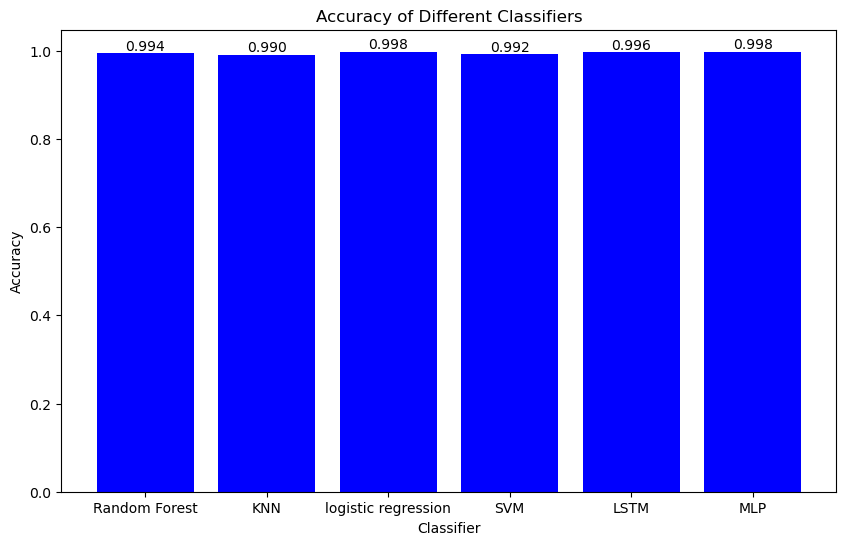

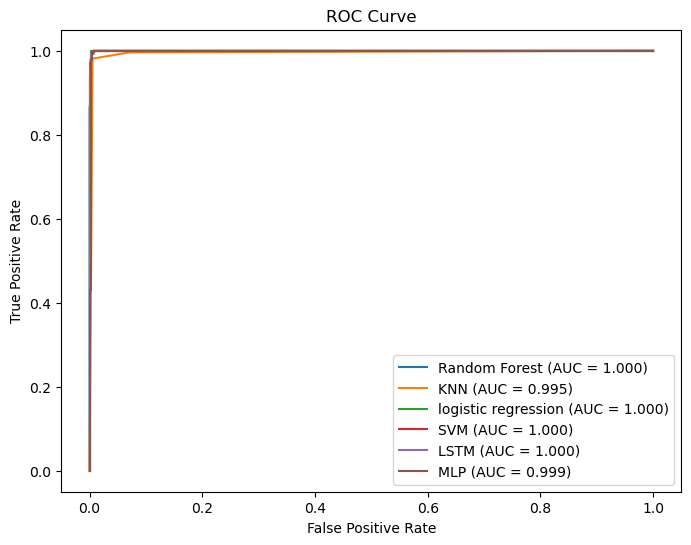

In [146]:
plot_bar_chart(classifiers, accuracies1)
plot_roc_curves(probas1, classifiers,Ytt1)

###  pour l'utilisation des carctéristiques extraite selon la deuxième méthode 

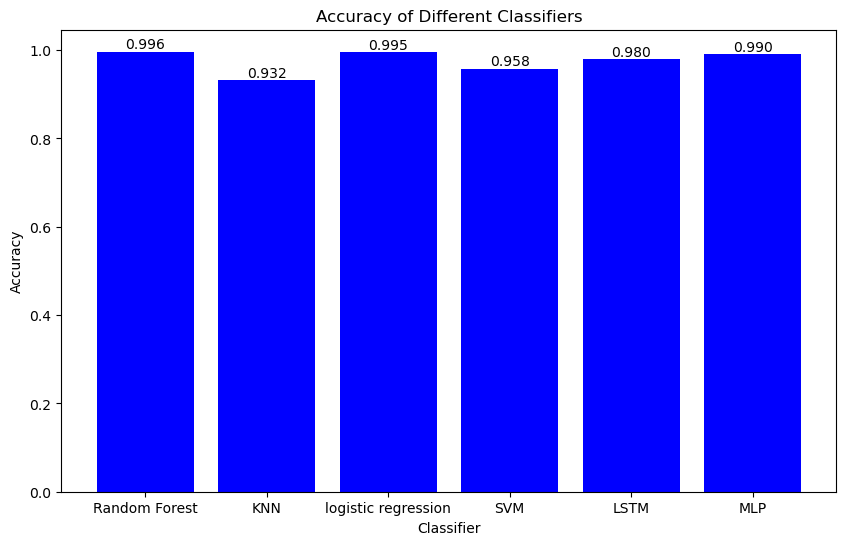

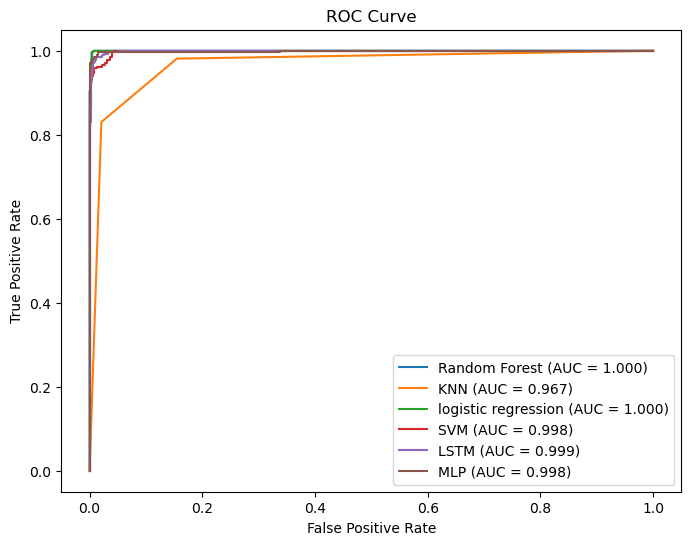

In [147]:

plot_bar_chart(classifiers, accuracies2)
plot_roc_curves(probas2, classifiers,Ytt2)

### Analyse des résultas

L'analyse des résultats de nos expérimentations a révélé que les meilleurs modèles pour la détection de spam étaient la Random Forest et la Logistic Regression parmi les algorithmes d'apprentissage automatique traditionnels, ainsi que les réseaux de neurones LSTM et MLP.

La Random Forest et la Logistic Regression ont obtenu des performances solides en termes d'exactitude, de précision et de rappel. Ces modèles ont réussi à capturer les schémas et les caractéristiques discriminantes des courriels de spam, leur permettant de fournir des prédictions précises.

Quant aux réseaux de neurones LSTM et MLP, ils ont également obtenu de bons résultats. Les LSTM, grâce à leur capacité à traiter les dépendances à long terme dans les données séquentielles, ont démontré leur efficacité dans la détection de spam. Les MLP, quant à eux, ont réussi à modéliser des relations non linéaires entre les caractéristiques d'entrée et les étiquettes de sortie.

Par ailleurs, nous avons constaté que l'utilisation des caractéristiques de la méthode "1" a conduit à de meilleurs résultats. Cette méthode a permis d'extraire rapidement et efficacement des informations pertinentes des courriels, ce qui a contribué à améliorer les performances des modèles. Les résultats ont été confirmés par l'analyse des graphes de bar d'accuracy et des courbes ROC tracées lors de la comparaison des différents modèles.

En résumé, nos expérimentations ont montré que les modèles Random Forest, Logistic Regression, LSTM et MLP étaient tous capables de fournir des résultats prometteurs dans la détection de spam. L'utilisation des caractéristiques de la méthode "1" s'est avérée particulièrement efficace, offrant à la fois simplicité et rapidité dans l'extraction des informations. Ces résultats nous permettent de choisir les meilleurs modèles et approches pour le déploiement d'un système de détection de spam efficace.

# Conclusion 

En conclusion, nos expérimentations dans la détection de spam ont démontré que tous les modèles, y compris la Random Forest, la Logistic Regression, les réseaux de neurones LSTM et MLP, ont obtenu d'excellents résultats avec les données disponibles. Cependant, il est important de souligner que ces résultats sont basés sur un ensemble de données spécifique, qui peut ne pas être totalement représentatif de la performance réelle des modèles.

Il est crucial de tester nos modèles avec des données plus difficiles et complexes pour évaluer et apprécier pleinement leur capacité et leur puissance. Les données réelles peuvent présenter une plus grande variabilité, des schémas plus subtils et des caractéristiques plus complexes. Tester les modèles sur de tels ensembles de données permettra d'obtenir une évaluation plus réaliste de leurs performances.

En outre, il convient de noter que les différents modèles de réseaux de neurones offrent des capacités et des avantages distincts. Les LSTM sont particulièrement adaptés au traitement de données séquentielles, tandis que les MLP peuvent capturer des relations non linéaires entre les caractéristiques d'entrée et les étiquettes de sortie. L'utilisation d'architectures de réseaux de neurones plus avancées et complexes peut également être explorée pour des tâches de détection de spam plus difficiles.

En somme, cette étude souligne l'importance de tester nos modèles avec des données plus représentatives pour une évaluation précise de leurs performances. Elle met également en évidence la diversité des architectures de réseaux de neurones disponibles et l'importance de choisir le modèle le mieux adapté à la tâche spécifique de détection de spam. Ce projet constitue une base solide pour approfondir la recherche et le développement de systèmes de détection de spam plus robustes et efficaces.